### 이상치
- 상식적인 범위를 벗어나는 데이터 값
- 이상치는 통계적인 방법과 도메인 지식을 이용해서 판단

In [1]:
import pandas as pd

In [2]:
mpg = pd.read_csv('mpg.csv')

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 이상치를 제거할 때 가장 많이 사용하는 시각화 그래프
- boxplot (상자그림)

In [4]:
import seaborn as sns

<AxesSubplot:ylabel='cty'>

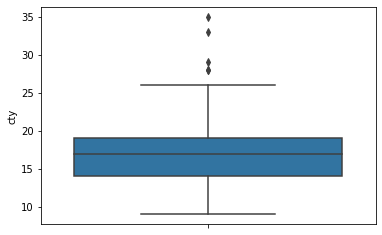

In [10]:
sns.boxplot(data=mpg , y = 'cty')

<AxesSubplot:ylabel='hwy'>

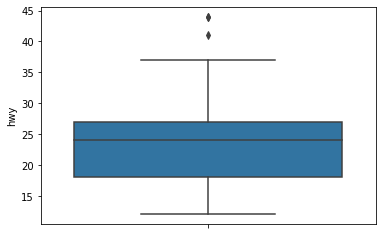

In [11]:
sns.boxplot(data=mpg , y = 'hwy')

- 상자 아래 세로선, 아랫수염, 하위 0%-25% 내에 해당하는 값
- 상자 밑면 1사분위수(Q1), 하위 25% 위치 값
- 상자 내 굵은 선 2사분위수(Q2), 하위 50% 위치 값 (중앙값)
- 상자 윗면 3사분위수(Q3), 하위75% 위치 값
- 상자 위 세로선, 윗수염, 하위 75%~100% 내에 해당하는 값
- 상자 밖 가로선 극단치 경계(이상치 경계) - Q1,Q3 밖 1.5 IQR내 최대값
- 상자 밖 점 표식 극단치(이상치), Q1, Q3 밖 1.5IQR을 벗어난 값

### 1사분위수, 3사분위수 값

- quantile() 분위수를 구할 수 있음
- 1사분위수는 하위 25%, 3사분위수는 하위 75% 값

In [12]:
qut25 = mpg['hwy'].quantile(.25)

In [13]:
qut25

18.0

In [14]:
qut75 = mpg['hwy'].quantile(.75)

In [15]:
qut75

27.0

In [17]:
qutt25 = mpg['cty'].quantile(.25)
qutt25

14.0

### IQR 구하기

- 1사분위수와 3사분위수의 거리를 Inter Quantile Range(IQR) 라고 부름, 사분위 범위

In [18]:
iqr = qut75 - qut25

In [19]:
iqr

9.0

### 상한, 하한 구하는 법
극단치의 경계가 되는 하한, 상한

- 하한 : 1사분위수보다 'IQR의 1.5배' 만큼 더 작은 값
- 상한 : 3사분위수보다 'IQR의 1.5배' 만큼 더 큰 값

In [20]:
qut25 - 1.5*iqr  #하한

4.5

In [21]:
qut75 + 1.5*iqr #상한

40.5

# 극단치(이상치)를 제거하는 이유
- 극단치가 전체적인 통계량에 왜곡을 줄 수 있음
- 통계량의 정규성을 유지하기 위해

### 극단치를 결측 처리하기!

In [22]:
import numpy as np

In [23]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5 ) , np.nan, mpg['hwy']) 
# 상한과 하한을 초과하는 값을 찾아서 결측 처리

In [19]:
mpg['hwy'].isna().sum() #이상치 3개가 결측 처리 되었음을 알 수 있다.

3

In [24]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy','mean')) 
# hwy 의 평균값을 drv로 그룹바이해서 묶어줌 

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 데이터를 추출하는 법
- 판다스에서 제공하는 다양한 메서드를 직접 확인!

In [25]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(max_hwy = ('hwy','max'))

,max_hwy
drv,
4,28.0
f,37.0
r,26.0


In [26]:
mpg.dropna().groupby('manufacturer').agg(mean_hwy = ('hwy','mean'))

,mean_hwy
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946
ford,19.360000
honda,32.555556
hyundai,26.857143
jeep,17.625000
land rover,16.500000
lincoln,17.000000


In [27]:
mpg.dropna(subset = ['hwy']).groupby('manufacturer').agg(mean_hwy = ('hwy','mean'))

,mean_hwy
manufacturer,
audi,26.444444
chevrolet,21.894737
dodge,17.945946
ford,19.360000
honda,32.555556
hyundai,26.857143
jeep,17.625000
land rover,16.500000
lincoln,17.000000


In [28]:
# 컬럼, 열 기준으로 데이터를 추출

mpg['manufacturer'] #컬럼 기준

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [29]:
mpg[['manufacturer','drv']] #컬럼 기준

,manufacturer,drv
0,audi,f
1,audi,f
2,audi,f
3,audi,f
4,audi,f
...,...,...
229,volkswagen,f
230,volkswagen,f
231,volkswagen,f
232,volkswagen,f


### 행 단위로 데이터를 추출하는 경우!

- loc : 인덱스를 기준으로 행 데이터 추출
- iloc : 행 번호를 기준으로 데이터 추출

In [30]:
mpg.loc[0] #인덱스 기준

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                 29.0
fl                     p
category         compact
Name: 0, dtype: object

In [28]:
mpg.loc[[0,4,233,12,41]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26.0,p,midsize
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25.0,p,compact
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24.0,r,minivan


In [31]:
# 변수를 대입할 수도 있음

mpg_rows = mpg.loc[0]
mpg_rows_1 = mpg_rows
print(mpg_rows_1)

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                 29.0
fl                     p
category         compact
Name: 0, dtype: object


In [32]:
mpg.shape #행과 열의 개수를 보여줌

(234, 11)

In [35]:
mpg_rows = mpg.shape[0]
mpg_rows_1 = mpg_rows
print(mpg_rows_1)

234


In [36]:
print(mpg.loc[0])
print()
print(mpg.iloc[0]) # loc 과 iloc 동일한 결과

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                 29.0
fl                     p
category         compact
Name: 0, dtype: object

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                 29.0
fl                     p
category         compact
Name: 0, dtype: object


In [37]:
mpg.iloc[-1] #맨 끝값 출력

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [38]:
y = range(1,16)

mpg.iloc[y]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28.0,p,compact
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27.0,p,compact


In [39]:
mpg_new = mpg.loc[[0,2,4,6,8]]

In [40]:
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact


In [41]:
mpg_new.iloc[1] #인덱스 기준이 아니라, 새로운 데이터의 행 번호를 기준으로 추출됨

manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                   31.0
fl                       p
category           compact
Name: 2, dtype: object

In [42]:
mpg_new.loc[1] # loc 에서는 1이라는 인덱스가 존재하지 않기 때문에 오류

KeyError: 1

In [43]:
mpg_new.iloc[6] #인덱스 6이 아닌 6번 행의 데이터를 추출하기 때문에 오류가 생김 (6행 존재 X)

IndexError: single positional indexer is out-of-bounds

In [44]:
mpg_new.loc[6] #인덱스 6의 데이터를 추출하기 때문에 정상적으로 작동

manufacturer        audi
model                 a4
displ                3.1
year                2008
cyl                    6
trans           auto(av)
drv                    f
cty                   18
hwy                 27.0
fl                     p
category         compact
Name: 6, dtype: object

### loc, iloc 자유자제로 다뤄보기

In [45]:
mpg.loc[1:100,['model','cty']] #슬라이싱

,model,cty
1,a4,21
2,a4,20
3,a4,21
4,a4,16
5,a4,18
...,...,...
96,mustang,15
97,mustang,15
98,mustang,14
99,civic,28


In [46]:
mpg.iloc[1:10,[1,2,3]] #iloc은 컬럼의 이름 뿐 아니라 컬럼의 순서로도 추출 가능 단, locs는 안됨 ! 

,model,displ,year
1,a4,1.8,1999
2,a4,2.0,2008
3,a4,2.0,2008
4,a4,2.8,1999
5,a4,2.8,1999
6,a4,3.1,2008
7,a4 quattro,1.8,1999
8,a4 quattro,1.8,1999
9,a4 quattro,2.0,2008


In [47]:
mpg.loc[1:10,[1,2,3]] #loc은 컬럼에 대해서 명칭을 적어줘야 한다. 

KeyError: "None of [Int64Index([1, 2, 3], dtype='int64')] are in the [columns]"

In [48]:
small_range = list(range(7))

In [49]:
small_range

[0, 1, 2, 3, 4, 5, 6]

In [50]:
mpg.iloc[:,small_range] # : 는 처음부터 끝까지

,manufacturer,model,displ,year,cyl,trans,drv
0,audi,a4,1.8,1999,4,auto(l5),f
1,audi,a4,1.8,1999,4,manual(m5),f
2,audi,a4,2.0,2008,4,manual(m6),f
3,audi,a4,2.0,2008,4,auto(av),f
4,audi,a4,2.8,1999,6,auto(l5),f
...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f
230,volkswagen,passat,2.0,2008,4,manual(m6),f
231,volkswagen,passat,2.8,1999,6,auto(l5),f
232,volkswagen,passat,2.8,1999,6,manual(m5),f


In [51]:
sm_range = list(range(0,10,2))

In [52]:
mpg.iloc[:, sm_range]

,manufacturer,displ,cyl,drv,hwy
0,audi,1.8,4,f,29.0
1,audi,1.8,4,f,29.0
2,audi,2.0,4,f,31.0
3,audi,2.0,4,f,30.0
4,audi,2.8,6,f,26.0
...,...,...,...,...,...
229,volkswagen,2.0,4,f,28.0
230,volkswagen,2.0,4,f,29.0
231,volkswagen,2.8,6,f,26.0
232,volkswagen,2.8,6,f,26.0


In [53]:
mpg.iloc[:,0:8:2] #컬럼 기준 0에서 7까지 2간격으로 == 0,2,4,6 컬럼에 대한 값을 출력

,manufacturer,displ,cyl,drv
0,audi,1.8,4,f
1,audi,1.8,4,f
2,audi,2.0,4,f
3,audi,2.0,4,f
4,audi,2.8,6,f
...,...,...,...,...
229,volkswagen,2.0,4,f
230,volkswagen,2.0,4,f
231,volkswagen,2.8,6,f
232,volkswagen,2.8,6,f


In [54]:
mpg.iloc[[1,2,3,4,5],[2,3,4,5]] 

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)


In [63]:
mpg.iloc[1:4,0:3] #슬라이싱을 할 때는 대괄호 안적어도 됨

,manufacturer,model,displ
1,audi,a4,1.8
2,audi,a4,2.0
3,audi,a4,2.0


In [65]:
mpg.loc[1:10,['manufacturer','model','hwy','cty']]

,manufacturer,model,hwy,cty
1,audi,a4,29.0,21
2,audi,a4,31.0,20
3,audi,a4,30.0,21
4,audi,a4,26.0,16
5,audi,a4,26.0,18
6,audi,a4,27.0,18
7,audi,a4 quattro,26.0,18
8,audi,a4 quattro,25.0,16
9,audi,a4 quattro,28.0,20
10,audi,a4 quattro,27.0,19


In [61]:
mpg.loc[[1,2,3,4,5],['displ','year','cyl','hwy']] #loc 에서는 컬럼명을 입력해줘야 함

,displ,year,cyl,hwy
1,1.8,1999,4,29.0
2,2.0,2008,4,31.0
3,2.0,2008,4,30.0
4,2.8,1999,6,26.0
5,2.8,1999,6,26.0


### 과제1. mpg 데이터를 기준으로
- loc, iloc 으로 데이터 추출하기
- 슬라이싱, 변수에 넣기 등을 최소 5개 이상씩 진행


### 과제2. mpg 데이터의 이상치를 다른 컬럼에서도 살펴보기
- 이상치를 살펴본 후 IQR을 계산해 이상치를 제거해주기